<a href="https://colab.research.google.com/github/carolina-garay/Henry_M6_ProyectoIntegrador/blob/main/Proyecto_Integrador_3_Modelamiento_Garay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

**Alumna: Carolina del Valle Garay**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




In [1]:
#Importamos librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

Cargamos la base de datos preparada desde la fase 2.

In [3]:
!gdown https://drive.google.com/file/d/1_2uu8taeZ3zeS-iGIAm5kLlpYVUrWMMB/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1_2uu8taeZ3zeS-iGIAm5kLlpYVUrWMMB
To: /content/Hospital_Garay.csv
100% 37.4k/37.4k [00:00<00:00, 17.2MB/s]


In [4]:
data = pd.read_csv("/content/Hospital_Garay.csv")

In [5]:
data.shape

(563, 26)

Separen el dataset en X, y (variable objetivo)

In [6]:
data.columns

Index(['BIOPSIA_NEG', 'BIOPSIA_ADENOCARCINOMA GLEASON 6 ',
       'BIOPSIA_ADENOCARCINOMA GLEASON 7 ', 'BIOPSIA_ADENOCARCINOMA GLEASON 6',
       'BIOPSIA_ADENOCARCINOMA GLEASON 10 ',
       'BIOPSIA_ADENOCARCINOMA GLEASON 9 ',
       'BIOPSIA_ADENOCARCINOMA GLEASON 8 ', 'BIOPSIA_PROSTATITIS',
       'BIOPSIA_HIPERPLASIA PROSTATICA', 'BIOPSIA_ADENOCARCINOMA GLEASON 7',
       'BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', 'edad',
       'diabetes', 'hospitaliz_ult_mes', 'PSA', 'vol_prostatico',
       'Enfermedad_pulmonar', 'nro_dias_post_bipsia_infeccion', 'fiebre',
       'infecc_tract_urinario', 'HOSPITALIZACION', 'dias_hosp_quirurgica',
       'dias_hosp_pac_critico', 'PSA_ref', 'Enf_pulmonar_ref',
       'vol_prostatico_ref'],
      dtype='object')

In [7]:
features = ['BIOPSIA_NEG', 'BIOPSIA_ADENOCARCINOMA GLEASON 6 ',
       'BIOPSIA_ADENOCARCINOMA GLEASON 7 ', 'BIOPSIA_ADENOCARCINOMA GLEASON 6',
       'BIOPSIA_ADENOCARCINOMA GLEASON 10 ',
       'BIOPSIA_ADENOCARCINOMA GLEASON 9 ',
       'BIOPSIA_ADENOCARCINOMA GLEASON 8 ', 'BIOPSIA_PROSTATITIS',
       'BIOPSIA_HIPERPLASIA PROSTATICA', 'BIOPSIA_ADENOCARCINOMA GLEASON 7',
       'BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', 'edad',
       'diabetes',
        'nro_dias_post_bipsia_infeccion', 'fiebre', 'PSA_ref', 'Enf_pulmonar_ref',
       'vol_prostatico_ref']

In [103]:
features3 = ['BIOPSIA_ADENOCARCINOMA GLEASON 7 ', 'BIOPSIA_ADENOCARCINOMA GLEASON 6',
       'BIOPSIA_ADENOCARCINOMA GLEASON 10 ',
       'BIOPSIA_ADENOCARCINOMA GLEASON 9 ', 'edad',
       'BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS',
       'diabetes', 'PSA_ref', 'Enf_pulmonar_ref','vol_prostatico_ref']

In [76]:
features4=[ 'diabetes','PSA_ref', 'vol_prostatico_ref','edad','Enf_pulmonar_ref', ]


In [124]:
features5=[ 'diabetes','PSA_ref', 'vol_prostatico_ref',
           'Enf_pulmonar_ref', 'infecc_tract_urinario']


In [158]:
features6=[ 'diabetes','PSA_ref', 'vol_prostatico_ref',
           'Enf_pulmonar_ref', 'infecc_tract_urinario',
            'BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']

In [159]:
X = data[features6]
y = data["HOSPITALIZACION"]

In [160]:
X.shape

(563, 6)

In [161]:
y

0      1
1      1
2      1
3      1
4      1
      ..
558    0
559    0
560    0
561    0
562    0
Name: HOSPITALIZACION, Length: 563, dtype: int64

In [162]:
X

,diabetes,PSA_ref,vol_prostatico_ref,Enf_pulmonar_ref,infecc_tract_urinario,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS
0,0,1,1,1,0,0
1,0,1,1,1,0,0
2,0,1,1,1,0,0
3,0,1,1,1,0,0
4,0,1,1,1,0,0
...,...,...,...,...,...,...
558,0,1,1,1,0,0
559,0,1,1,1,0,0
560,0,1,0,1,0,0
561,0,1,1,0,0,0


In [163]:
print(data.value_counts(data['HOSPITALIZACION'], sort = True))

HOSPITALIZACION
0    539
1     24
Name: count, dtype: int64


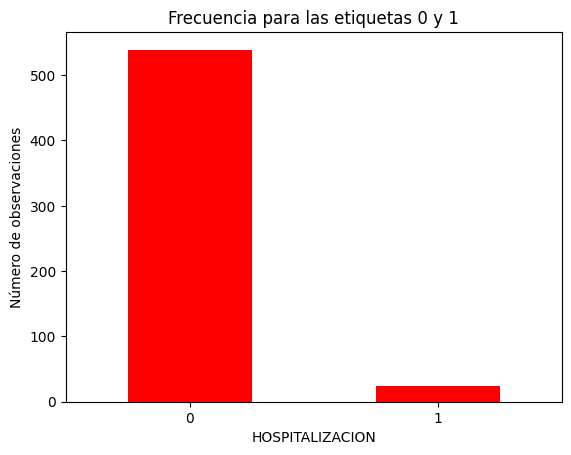

In [164]:
count_HOSPITALIZACION = pd.value_counts(data['HOSPITALIZACION'], sort = True)
count_HOSPITALIZACION.plot(kind = 'bar', rot=0, color='red')
plt.xticks(range(2))
plt.title("Frecuencia para las etiquetas 0 y 1")
plt.xlabel("HOSPITALIZACION")
plt.ylabel("Número de observaciones");

Observamos que hay un desblance en la cantidad de datos para cada etiqueta. Este resultado tendrá un impacto directo en el modelo que ajuste a la variable a predecir, se aconseja no utilizar la métrica accuracy ya que en este caso no es un buen indicador de precisión (accuracy se obtiene dividiendo el numero total de predicciones correctas dividido por el número total de predicciones)

Separen el dataset en X_train, X_test, y_train y y_test

In [165]:
x_train0, x_test0, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=22)

Escalamos el conjunto de datos para asegurarnos de trabajar con las mismas unidades

In [166]:
scaler = StandardScaler()
scaler.fit(x_train0)  # Conjunto de entrenamiento
x_train = scaler.transform(x_train0)
x_test = scaler.transform(x_test0)  # Conjunto de evaluación

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [167]:
DecisionTreeClassifier().get_params() # param por defecto

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [168]:
clasift = DecisionTreeClassifier(random_state=22)
clasift.fit(x_train, y_train)

DecisionTreeClassifier(random_state=22)

In [169]:
#Predecimos valores "y" del conjunto de entrenamiento y del conjunto de evaluación
y_train_predt = clasift.predict(x_train)
y_test_predt = clasift.predict(x_test)

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización.

In [170]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_predt)
matrix_2 = confusion_matrix(y_test, y_test_predt)

In [171]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2) #conjunto de evaluación

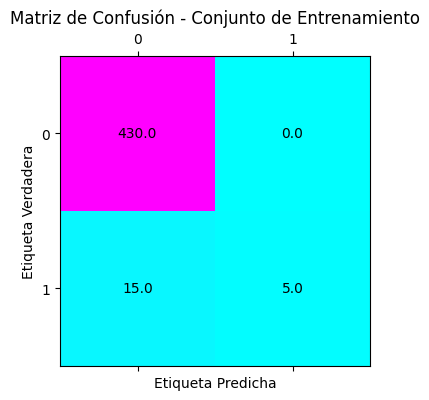

In [172]:
cmap = plt.cm.cool
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix, cmap=cmap)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Verdadera')
ax.set_title('Matriz de Confusión - Conjunto de Entrenamiento')
plt.show()

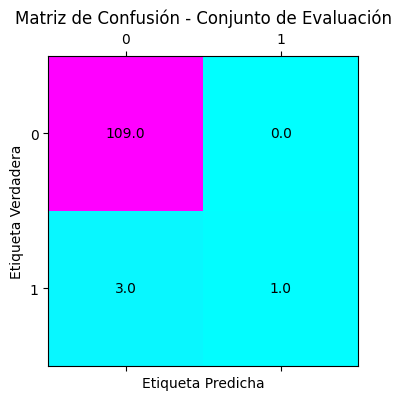

In [173]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix, cmap=cmap)
for (i, j), z in np.ndenumerate(matrix_2):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Verdadera')
ax.set_title('Matriz de Confusión - Conjunto de Evaluación')
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [174]:
train_acc = accuracy_score(y_train, y_train_predt)
test_acc = accuracy_score(y_test, y_test_predt)
print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.967
Test accuracy: 0.973


In [175]:
#Evaluamos sobre el conjunto de entrenamiento y sobre el conjunto de evaluación,
# reportando las métricas
print("Train dataset accuracy: %0.03f" % clasift.score(x_train,y_train))
print("****Reporte de clasificación sobre conjunto de entrenamiento*****")
print(classification_report(y_train, y_train_predt))

Train dataset accuracy: 0.967
****Reporte de clasificación sobre conjunto de entrenamiento*****
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       430
           1       1.00      0.25      0.40        20

    accuracy                           0.97       450
   macro avg       0.98      0.62      0.69       450
weighted avg       0.97      0.97      0.96       450



In [176]:
print("Train dataset accuracy: %0.03f" % clasift.score(x_test,y_test))
print("****Reporte de clasificación sobre conjunto de evaluación*****")
print(classification_report(y_test, y_test_predt))

Train dataset accuracy: 0.973
****Reporte de clasificación sobre conjunto de evaluación*****
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       109
           1       1.00      0.25      0.40         4

    accuracy                           0.97       113
   macro avg       0.99      0.62      0.69       113
weighted avg       0.97      0.97      0.97       113



Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria.

In [177]:
for n, criterion in enumerate(('gini','entropy')):
    param_grid2 = {
     'max_depth': [1,2,3,4,5,6],  # Profundidad máxima del árbol
        'min_samples_leaf': [1,2],  # Cantidad mínima de samples por hoja
    }
    modelt = DecisionTreeClassifier(random_state=22,criterion=criterion)
    cvt = GridSearchCV(modelt, param_grid2, scoring='accuracy',cv=5)
    cvt.fit(x_train, y_train)

    print("******************************************************************")
    print("*********Hiperparámetros para criterio de partición",criterion,"*********")
    print("Mejor conjunto de parámetros:")
    print(cvt.best_params_)
    print("Best accuracy: %0.03f" % cvt.score(x_train,y_train))

    y_train_predtt = cvt.predict(x_train)
    print("****Reporte de clasificación sobre conjunto de entrenamiento (métricas)*****")
    print(classification_report(y_train, y_train_predtt))

    meant = cvt.cv_results_['mean_test_score']
    stdt = cvt.cv_results_['std_test_score']
    for mean, std, params in zip(meant, stdt, cvt.cv_results_['params']):
        print("Ac.promedio: %0.4f y var (+/-%0.04f) para los parámetros %r" % (mean, std ** 2, params))

******************************************************************
*********Hiperparámetros para criterio de partición gini *********
Mejor conjunto de parámetros:
{'max_depth': 1, 'min_samples_leaf': 1}
Best accuracy: 0.967
****Reporte de clasificación sobre conjunto de entrenamiento (métricas)*****
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       430
           1       1.00      0.25      0.40        20

    accuracy                           0.97       450
   macro avg       0.98      0.62      0.69       450
weighted avg       0.97      0.97      0.96       450

Ac.promedio: 0.9667 y var (+/-0.0000) para los parámetros {'max_depth': 1, 'min_samples_leaf': 1}
Ac.promedio: 0.9667 y var (+/-0.0000) para los parámetros {'max_depth': 1, 'min_samples_leaf': 2}
Ac.promedio: 0.9667 y var (+/-0.0000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1}
Ac.promedio: 0.9667 y var (+/-0.0000) para los parámetros {'max_depth': 2, 'm

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria.

In [178]:
KNeighborsClassifier().get_params() # param por defecto

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [179]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=13)

In [180]:
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [181]:
y_train_predtk = clasift.predict(x_train)
y_test_predtk = clasift.predict(x_test)

In [182]:
train_acc = accuracy_score(y_train, y_train_predtk)
test_acc = accuracy_score(y_test, y_test_predtk)
print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.967
Test accuracy: 0.973


In [183]:
print("Train dataset accuracy: %0.03f" % clasift.score(x_test,y_test))
print("****Reporte de clasificación sobre conjunto de evaluación*****")
print(classification_report(y_test, y_test_predtk))

Train dataset accuracy: 0.973
****Reporte de clasificación sobre conjunto de evaluación*****
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       109
           1       1.00      0.25      0.40         4

    accuracy                           0.97       113
   macro avg       0.99      0.62      0.69       113
weighted avg       0.97      0.97      0.97       113



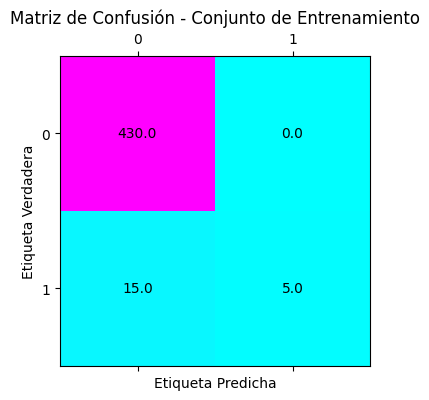

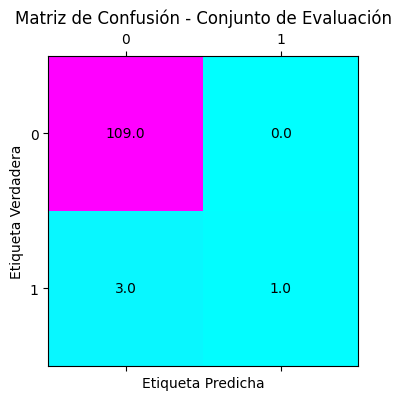

In [211]:
matrix = confusion_matrix(y_train, y_train_predtk)
matrix_2 = confusion_matrix(y_test, y_test_predtk)

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2) #conjunto de evaluación

cmap = plt.cm.cool
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix, cmap=cmap)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Verdadera')
ax.set_title('Matriz de Confusión - Conjunto de Entrenamiento')
plt.show()

fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix, cmap=cmap)
for (i, j), z in np.ndenumerate(matrix_2):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Verdadera')
ax.set_title('Matriz de Confusión - Conjunto de Evaluación')
plt.show()

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir?

Observamos que las métricas siguen el mismo comportamiento al ajustar los hiperparámetros

## Clasificador Lineal

In [204]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=22)
model.fit(x_train, y_train)
y_train_pred2 = model.predict(x_train)
y_test_pred2 = model.predict(x_test)

In [205]:
train_acc = accuracy_score(y_train, y_train_pred2)
test_acc = accuracy_score(y_test, y_test_pred2)
print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.967
Test accuracy: 0.973


In [206]:
print("Train dataset accuracy: %0.03f" % clasift.score(x_test,y_test))
print("****Reporte de clasificación sobre conjunto de entrenamiento*****")
print(classification_report(y_train, y_train_pred2))

Train dataset accuracy: 0.973
****Reporte de clasificación sobre conjunto de entrenamiento*****
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       430
           1       1.00      0.25      0.40        20

    accuracy                           0.97       450
   macro avg       0.98      0.62      0.69       450
weighted avg       0.97      0.97      0.96       450



In [207]:
print("Train dataset accuracy: %0.03f" % clasift.score(x_test,y_test))
print("****Reporte de clasificación sobre conjunto de evaluación*****")
print(classification_report(y_test, y_test_pred2))

Train dataset accuracy: 0.973
****Reporte de clasificación sobre conjunto de evaluación*****
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       109
           1       1.00      0.25      0.40         4

    accuracy                           0.97       113
   macro avg       0.99      0.62      0.69       113
weighted avg       0.97      0.97      0.97       113



In [208]:
matrix = confusion_matrix(y_train, y_train_pred2)
matrix_2 = confusion_matrix(y_test, y_test_pred2)

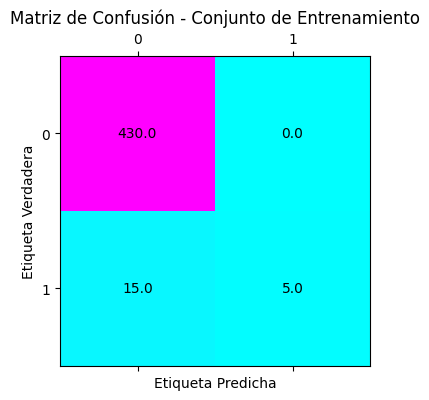

In [209]:
cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2) #conjunto de evaluación

cmap = plt.cm.cool
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix, cmap=cmap)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Verdadera')
ax.set_title('Matriz de Confusión - Conjunto de Entrenamiento')
plt.show()

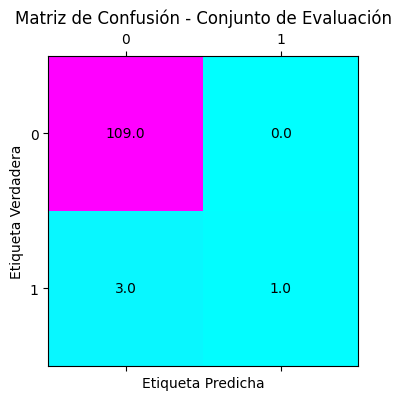

In [210]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix, cmap=cmap)
for (i, j), z in np.ndenumerate(matrix_2):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Verdadera')
ax.set_title('Matriz de Confusión - Conjunto de Evaluación')
plt.show()

## Modelo RandomForest

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
clf3 = RandomForestClassifier(class_weight='balanced', random_state=42)
clf3.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [198]:
y_train_pred3 = clf2.predict(x_train)
y_test_pred3 = clf2.predict(x_test)

In [199]:
#Evaluamos sobre el conjunto de entrenamiento y sobre el conjunto de evaluación,
# reportando las métricas
print("Train dataset accuracy: %0.03f" % clasift.score(x_train,y_train))
print("****Reporte de clasificación sobre conjunto de entrenamiento*****")
print(classification_report(y_train, y_train_pred3))

Train dataset accuracy: 0.967
****Reporte de clasificación sobre conjunto de entrenamiento*****
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       430
           1       0.16      0.50      0.24        20

    accuracy                           0.86       450
   macro avg       0.57      0.69      0.58       450
weighted avg       0.94      0.86      0.89       450



In [192]:
matrix = confusion_matrix(y_train, y_train_pred3)
matrix_2 = confusion_matrix(y_test, y_test_pred3)

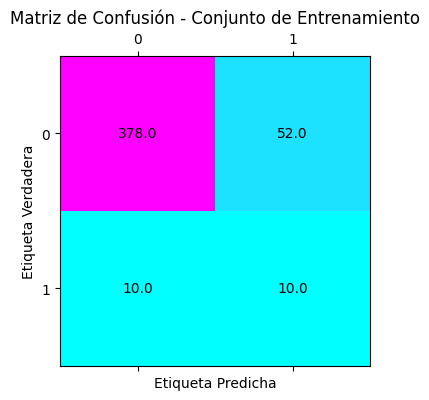

In [200]:
cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2) #conjunto de evaluación

cmap = plt.cm.cool
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix, cmap=cmap)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Verdadera')
ax.set_title('Matriz de Confusión - Conjunto de Entrenamiento')
plt.show()

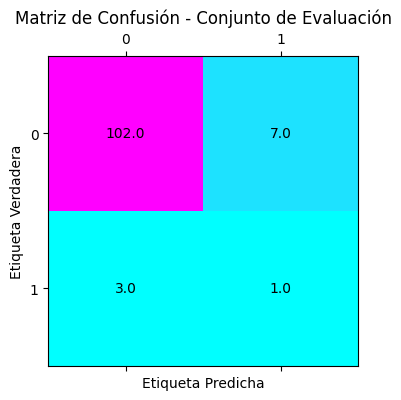

In [201]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix, cmap=cmap)
for (i, j), z in np.ndenumerate(matrix_2):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Verdadera')
ax.set_title('Matriz de Confusión - Conjunto de Evaluación')
plt.show()

In [202]:
print("Train dataset accuracy: %0.03f" % clasift.score(x_test,y_test))
print("****Reporte de clasificación sobre conjunto de evaluación*****")
print(classification_report(y_test, y_test_pred3))

Train dataset accuracy: 0.973
****Reporte de clasificación sobre conjunto de evaluación*****
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       109
           1       0.12      0.25      0.17         4

    accuracy                           0.91       113
   macro avg       0.55      0.59      0.56       113
weighted avg       0.94      0.91      0.93       113



## **De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo?**

Respuesta: Dado que se entrenaron los modelos con distintas combinaciones de featrures según la correlación y las perfomances no mejoraron, se aconseja realizar un nuevo relevamiento de variables en el dataset original. Observamos un sobreajuste.